# Boxplots/Correlation

1. Boxplots
    * Quantiles
    * Whiskers
2. Histograms and Standard Deviation

**Task 0**

1. Read chapters 1 and 2 in the [ThinkStats](https://greenteapress.com/wp/think-python-2e/) book in the cloud folder

## Explore the Titanic Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Boxplots

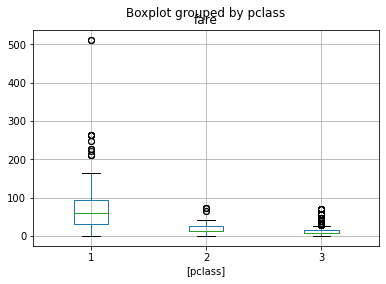

In [3]:
boxplot = titanic[['fare','pclass']].boxplot(by='pclass',return_type='dict' )

## Task 1

1. Read up the basics of boxplots: https://en.wikipedia.org/wiki/Box_plot, in particular the paragraph explaining the **whiskers**.
2. Read up the definition of **Quartiles** and **Quantiles** and **IQR**. A good source would be the *ThinkStats* book (in the cloud folder).
3. (**MC**) What are the exact values of the lower and upper whiskers (of fare) for the pclass2 passengers? 
    * **A** $[0, 41.6]$
    * **B** $[0, 45.5]$
    * **C** $[-6.5, 45.5]$
    * **D** $[0, 46.1]$


Recall the Wikipedia definition:<br><br>*From above the upper quartile, a distance of 1.5 times the IQR is measured out and a whisker is drawn up to the largest observed point from the dataset that falls within this distance. Similarly, a distance of 1.5 times the IQR is measured out below the lower quartile and a whisker is drawn up to the lower observed point from the dataset that falls within this distance.*

### Task 1.3
* **(MC) What are the exact values of the lower and upper whiskers (of fare) for the pclass2 passengers?**

In [4]:
titanic[['fare','pclass']].groupby('pclass').describe()

fare                                                              
        count       mean        std  min       25%      50%   75%       max
pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

## Explore the Auto Data

In [5]:
df = pd.read_csv('../data/Auto.csv')
df.head()
#df.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [6]:
# global mean
df.mean()

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
origin             1.576531
dtype: float64

In [7]:
# mpg mean
a = df["mpg"].mean()
b = df.iloc[:,0].mean()
c = np.mean(df["mpg"])

print(f'mpg mean:\na = {a}\nb = {b}\nc = {c}')

mpg mean:
a = 23.44591836734694
b = 23.44591836734694
c = 23.44591836734694


(array([ 3., 10., 40., 38., 36., 37., 29., 29., 20., 33., 24., 24., 20.,
        17., 13.,  9.,  3.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

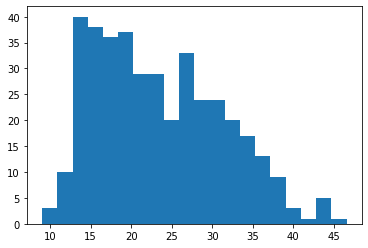

In [8]:
#. Plot a histogram of mpg
plt.hist(df["mpg"], 20)

Text(0, 0.5, 'mpg')

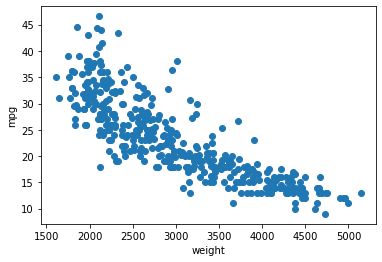

In [9]:
#scatterplot
plt.scatter("weight", "mpg",data=df)
plt.xlabel("weight")
plt.ylabel("mpg")

## Task 2

1. Compute the mean mpg grouped by cylinder.
2. Create a boxplot of mpg vs. cylinder
3. Find the median and lower/upper quartiles
4. Read up the definition of **correlation**. ( *ThinkStats* book in the cloud folder). Compute the correlation coefficient between *mpg* and *weight*.
5. Compute the correlation coefficient $\rho$ between *mpg* and *origin*. Discuss whether (i) there is a conceptual difference between the previous task, and (ii) whether it even makes sense to compute $\rho$ for this pair of variables. In that context, learn about [categorical data types in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html).
6. What is the correlation coefficient "good for" ? Can you e.g. use it to make predictions, like in our previous simple probability model ? If not, what is missing ? Think about a *loss function* which would make sense for such a prediction task.
